In [1]:
import pandas as pd
import numpy as np

In [2]:
path = 'datasets/'
covid_country = pd.read_csv(path + 'covid_19_data.csv')
covid_summary = pd.read_csv(path + 'COVID19_open_line_list.csv')
covid_confirmed = pd.read_csv(path + 'time_series_covid_19_confirmed.csv')
covid_deaths = pd.read_csv(path + 'time_series_covid_19_deaths.csv')
covid_recovered = pd.read_csv(path + 'time_series_covid_19_recovered.csv')

In [3]:
covid_country.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [4]:
covid_country.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     27961
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [5]:
covid_country.duplicated().sum()

0

In [6]:
covid_summary.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
covid_summary.columns
covid_summary.dtypes

ID                          float64
age                          object
sex                          object
city                         object
province                     object
country                      object
wuhan(0)_not_wuhan(1)       float64
latitude                    float64
longitude                   float64
geo_resolution               object
date_onset_symptoms          object
date_admission_hospital      object
date_confirmation            object
symptoms                     object
lives_in_Wuhan               object
travel_history_dates         object
travel_history_location      object
reported_market_exposure     object
additional_information       object
chronic_disease_binary      float64
chronic_disease              object
source                       object
sequence_available           object
outcome                      object
date_death_or_discharge      object
notes_for_discussion         object
location                     object
admin3                      

In [8]:
covid_summary.drop(covid_summary.columns[covid_summary.columns.str.contains('Unnamed',case = False)], axis=1, inplace=True)
covid_summary.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN


In [9]:
covid_summary.isnull().sum()

ID                            953
age                         12777
sex                         12862
city                         3932
province                     1220
country                       978
wuhan(0)_not_wuhan(1)         956
latitude                      979
longitude                     979
geo_resolution                979
date_onset_symptoms         13380
date_admission_hospital     13396
date_confirmation            1037
symptoms                    13633
lives_in_Wuhan              13561
travel_history_dates        13623
travel_history_location     13368
reported_market_exposure    14091
additional_information      11714
chronic_disease_binary      14108
chronic_disease             14113
source                       1176
sequence_available          14125
outcome                     13942
date_death_or_discharge     14033
notes_for_discussion        13939
location                    13102
admin3                      12967
admin2                       5058
admin1        

In [10]:
covid_summary.drop(columns=['date_onset_symptoms', 'date_admission_hospital', 'symptoms', 'lives_in_Wuhan', \
                            'travel_history_dates', 'travel_history_location', 'reported_market_exposure', \
                            'additional_information', 'chronic_disease_binary', 'chronic_disease', \
                            'sequence_available', 'outcome', 'date_death_or_discharge', 'notes_for_discussion', \
                            'location', 'admin3', 'admin2', 'admin1', 'data_moderator_initials'], axis=1, inplace=True)

In [11]:
covid_summary.isnull().sum()

ID                         953
age                      12777
sex                      12862
city                      3932
province                  1220
country                    978
wuhan(0)_not_wuhan(1)      956
latitude                   979
longitude                  979
geo_resolution             979
date_confirmation         1037
source                    1176
country_new               1047
admin_id                  1023
dtype: int64

In [12]:
covid_summary.dropna(axis=0, inplace=True)

In [13]:
covid_summary.isnull().sum()

ID                       0
age                      0
sex                      0
city                     0
province                 0
country                  0
wuhan(0)_not_wuhan(1)    0
latitude                 0
longitude                0
geo_resolution           0
date_confirmation        0
source                   0
country_new              0
admin_id                 0
dtype: int64

In [14]:
covid_summary.duplicated().sum()

0

In [15]:
covid_summary.drop_duplicates(keep='last')
covid_summary.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_confirmation,source,country_new,admin_id
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,22.01.2020,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,China,340181
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,23.01.2020,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,China,340111
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,23.01.2020,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,China,340104
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,23.01.2020,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,China,340104
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,23.01.2020,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,China,340122


In [16]:
covid_confirmed.drop('Province/State', axis=1, inplace=True)
covid_confirmed.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,08/01/2020,08/02/2020,08/03/2020,08/04/2020,08/05/2020,08/06/2020,08/07/2020,08/08/2020,08/09/2020,08/10/2020
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,925,925,937,939,939,944,955,955,955,963
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679


In [17]:
covid_confirmed.columns = covid_confirmed.columns.str.replace('2020', '20')

In [18]:
covid_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1283,1284,1288,1288,1294,1298,1307,1312,1312,1328
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,161,166,172,176,182,188,189,193,199,200
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1223,1231,1239,1248,1261,1273,1282,1293,1302,1312
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,54,55,58,59,62,64,67,70,75,78


In [19]:
covid_deaths.drop('Province/State', axis=1, inplace=True)
covid_deaths.columns = covid_deaths.columns.str.replace('2020', '20')

In [20]:
covid_deaths.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,1283,1284,1288,1288,1294,1298,1307,1312,1312,1328
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,161,166,172,176,182,188,189,193,199,200
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,1223,1231,1239,1248,1261,1273,1282,1293,1302,1312
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,54,55,58,59,62,64,67,70,75,78


In [21]:
covid_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,25509,25510,25669,25669,25742,25840,25903,25960,25960,26228
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2961,3018,3031,3031,3123,3155,3227,3268,3342,3379
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,20988,21419,21901,22375,22802,23238,23667,24083,24506,24920
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,807,807,821,825,825,828,839,839,839,839
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,460,461,476,503,506,520,544,564,567,569


In [26]:
covid_recovered.columns = covid_recovered.columns.str.replace('2020', '20')

In [27]:
covid_recovered.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,25509,25510,25669,25669,25742,25840,25903,25960,25960,26228
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,2961,3018,3031,3031,3123,3155,3227,3268,3342,3379
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,20988,21419,21901,22375,22802,23238,23667,24083,24506,24920
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,807,807,821,825,825,828,839,839,839,839
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,460,461,476,503,506,520,544,564,567,569


In [53]:
covid_confirmed.columns = covid_deaths.columns.str.replace('20', '2020')
covid_deaths.columns = covid_deaths.columns.str.replace('20', '2020')
covid_recovered.columns = covid_deaths.columns.str.replace('20', '2020')

In [66]:
covid_confirmed.head()

,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,...,8/1/2020,8/2/2020,8/3/2020,8/4/2020,8/5/2020,8/6/2020,8/7/2020,8/8/2020,8/9/2020,8/10/2020
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,925,925,937,939,939,944,955,955,955,963
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679


In [148]:
# date_range = pd.date_range(start='1/22/2020', end='8/10/2020', freq='H')
# date_range = date_range.strftime('%m/%d/%Y').tolist()
# covid_deaths

In [155]:
covid_confirmed.index.tolist()
# covid_confirmed.loc[['Country/Region', 'Lat', 'Long'], date_range]
covid_confirmed.loc[['Indonesia'], '1/22/2020':]

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,8/1/2020,8/2/2020,8/3/2020,8/4/2020,8/5/2020,8/6/2020,8/7/2020,8/8/2020,8/9/2020,8/10/2020
Country/Region,,,,,,,,,,,,,,,,,,,,,
Indonesia,0,0,0,0,0,0,0,0,0,0,...,109936,111455,113134,115056,116871,118753,121226,123503,125396,127083


In [160]:
covid_deaths.head()

,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,...,8/1/2020,8/2/2020,8/3/2020,8/4/2020,8/5/2020,8/6/2020,8/7/2020,8/8/2020,8/9/2020,8/10/2020
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,1283,1284,1288,1288,1294,1298,1307,1312,1312,1328
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,161,166,172,176,182,188,189,193,199,200
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,1223,1231,1239,1248,1261,1273,1282,1293,1302,1312
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,54,55,58,59,62,64,67,70,75,78


In [161]:
covid_deaths.set_index('Country/Region', inplace=True)
covid_deaths.loc[['Indonesia'], '1/22/2020':]

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,8/1/2020,8/2/2020,8/3/2020,8/4/2020,8/5/2020,8/6/2020,8/7/2020,8/8/2020,8/9/2020,8/10/2020
Country/Region,,,,,,,,,,,,,,,,,,,,,
Indonesia,0,0,0,0,0,0,0,0,0,0,...,5193,5236,5302,5388,5452,5521,5593,5658,5723,5765


In [200]:
covid_recovered.loc[['Indonesia'], '1/22/2020':]

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,8/1/2020,8/2/2020,8/3/2020,8/4/2020,8/5/2020,8/6/2020,8/7/2020,8/8/2020,8/9/2020,8/10/2020
Country/Region,,,,,,,,,,,,,,,,,,,,,
Indonesia,0,0,0,0,0,0,0,0,0,0,...,67919,68975,70237,72050,73889,75645,77557,79306,80952,82236


In [224]:
indonesia_case =  pd.concat([covid_confirmed.loc[['Indonesia'], '1/22/2020':], covid_deaths.loc[['Indonesia'], '1/22/2020':], \
                        covid_recovered.loc[['Indonesia'], '1/22/2020':]]).transpose()
indonesia_case.columns = ['Confirmed', 'Death', 'Recovered']
indonesia_case.head()

,Confirmed,Death,Recovered
1/22/2020,0,0,0
1/23/2020,0,0,0
1/24/2020,0,0,0
1/25/2020,0,0,0
1/26/2020,0,0,0


In [227]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

c:\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


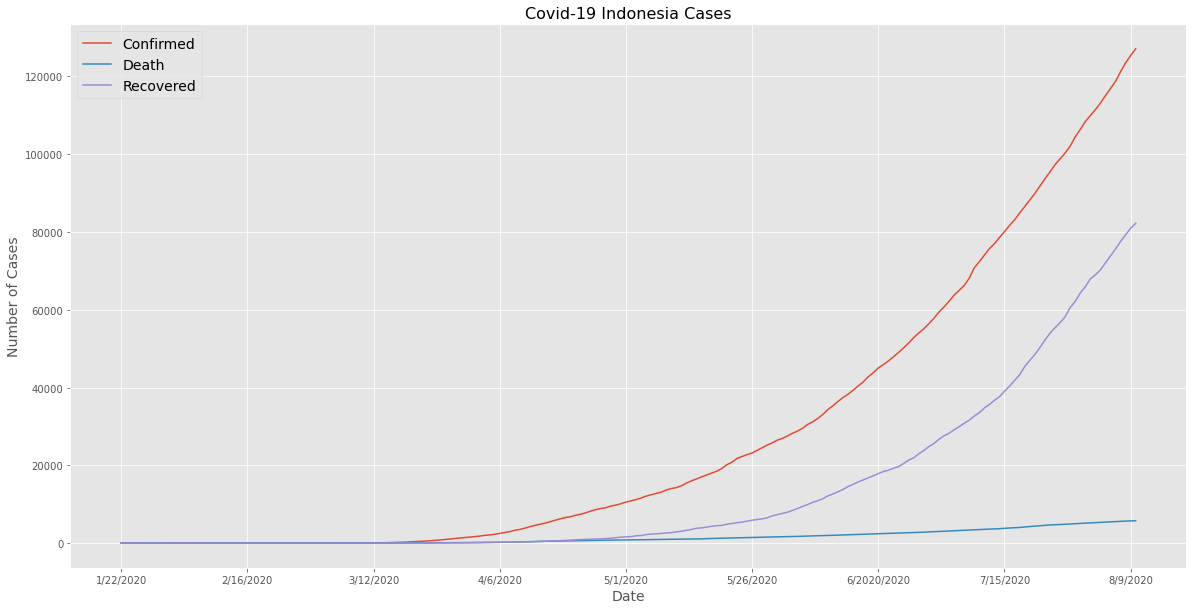

In [234]:
indonesia_case.plot(kind='line', figsize=(20, 10))

plt.title('Covid-19 Indonesia Cases', fontsize=16)
plt.ylabel('Number of Cases', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=14)
plt.show() # need this line to show the updates made to the figure

In [236]:
import folium
from folium import plugins

In [237]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json

In [317]:
covid_map = pd.read_csv(path + 'time_series_covid_19_confirmed.csv')
covid_map.drop('Province/State', axis=1, inplace=True)
covid_map.rename(columns={'Country/Region':'Country'}, inplace=True)

In [319]:
latitudes = list(covid_map['Lat'])
longitudes = list(covid_map['Long'])
labels = list(covid_map['Country'])
latitude = 37.77
longitude = -122.42

In [321]:
maps = folium.Map(location = [latitude, longitude], zoom_start = 12)

for lat, lng, label in zip(covid_map.Lat, covid_map.Long, covid_map.Country):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(maps)

maps